In [18]:
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt

#from distvis import plots as dplot

In [2]:
datos = pd.read_csv('../datos/datos_procesados.csv').iloc[:, 1:]

In [3]:
numerical_features = [
    'edad', 'meses_empleo'
]

categorical_features = [
    'sexo', 'rol_hogar', 'tipo_zona', 
    'termino_nivel', 'cine', 'est_conyugal', 'region', 'comuna', 'provincia',
    'est_subcontratado', 'categoria_empleo', 'grupo_ocupacion', 'nacionalidad',
    'rango_edad'
]

features = categorical_features + numerical_features
target = "sueldo_neto"

# Sesgos de los datos

In [65]:
def diferencia_pct(sueldo_hombres, sueldo_mujeres):
    return ((sueldo_hombres[:, None] - sueldo_mujeres[None, :])/sueldo_mujeres[None, :]).flatten()

def dif_pct_sexo(datos, samples=100):
    sueldo_hombres = np.random.choice(datos.query('sexo == "Hombre"')[target].values, samples, replace=True)
    sueldo_mujeres = np.random.choice(datos.query('sexo == "Mujer"')[target].values, samples, replace=True)
    
    return diferencia_pct(sueldo_hombres, sueldo_mujeres)

## Comparar un hombre random con una mujer random

In [85]:
sueldo_hombres = datos.query('sexo == "Hombre"')[target].values
sueldo_mujeres = datos.query('sexo == "Mujer"')[target].values

comparaciones = dif_pct_sexo(datos, samples=1000)

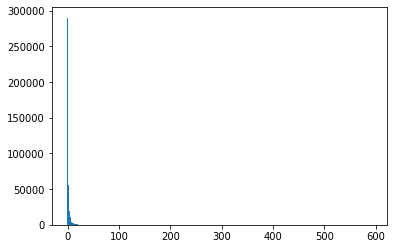

In [86]:
plt.hist(comparaciones, bins=1000);

In [87]:
comparaciones.mean()

1.2944108280687074

In [46]:
np.quantile(comparaciones, 0.5)

0.210589007725735

In [55]:
np.quantile(comparaciones, 0.45)

0.08333415697580952

In [43]:
comparaciones.mean()

1.3206856751495035

In [47]:
(comparaciones < 0).mean()

0.4064317984140042

In [ ]:
(comparaciones < 0).mean()

## Por grupos demográficos

Dividimos la base de datos en grupos demograficos en base a las siguientes variables:
- cine
- categoria_empleo
- grupo_ocupacion
- rango_edad

Asumimos que las diferencias de sueldos para hombre y mujeres para personas en un mismo grupo deberían ser similares

In [28]:
hombres = datos.query('sexo == "Hombre"')[target].values
mujeres = datos.query('sexo == "Mujer"')[target].values

np.quantile(((hombres[:, None] - mujeres[None, :])/mujeres[None, :]).flatten(), 0.5)

0.210589007725735

1.3206856751495035

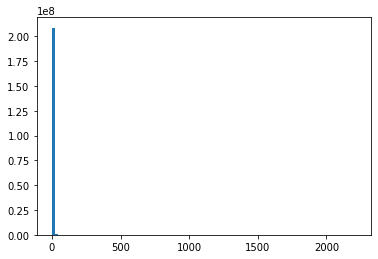

In [23]:
plt.hist(((hombres[:, None] - mujeres[None, :])/mujeres[None, :]).flatten(), bins=100);

In [6]:
grupos = ['cine', 'categoria_empleo', 'grupo_ocupacion', 'rango_edad']
datos.groupby(groupos)

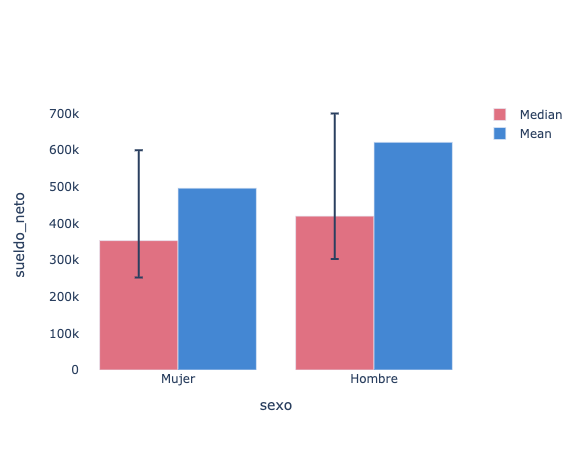

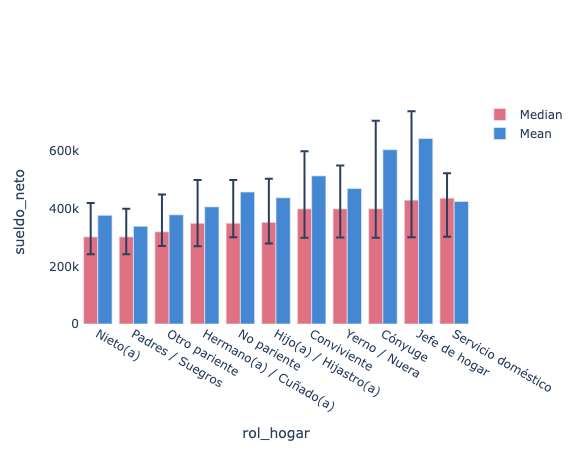

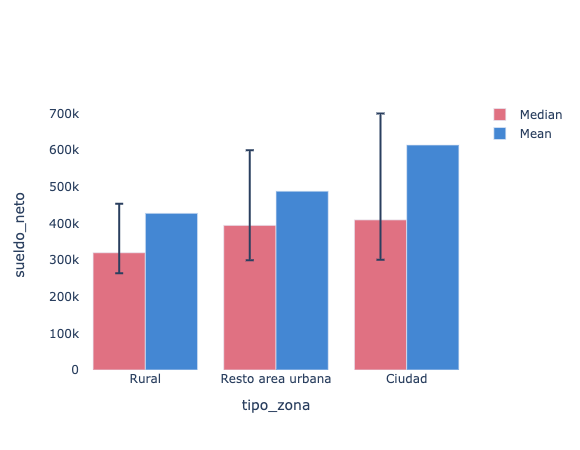

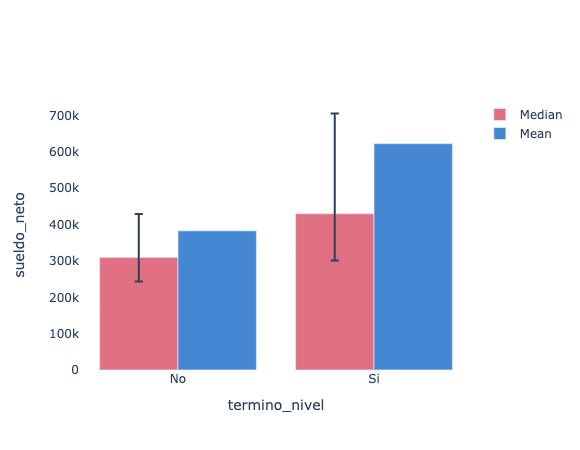

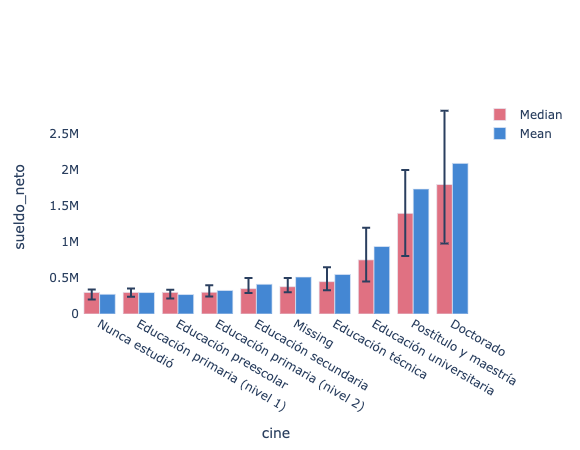

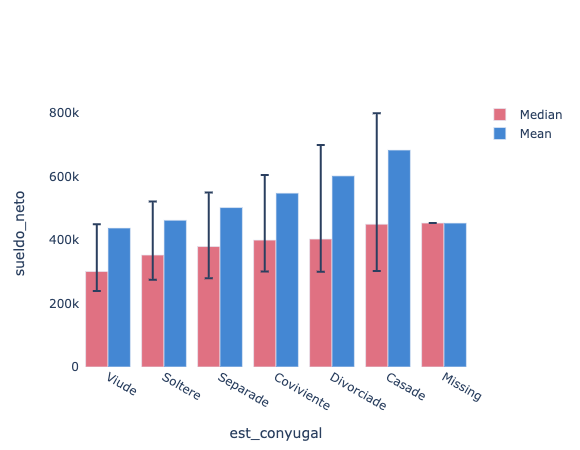

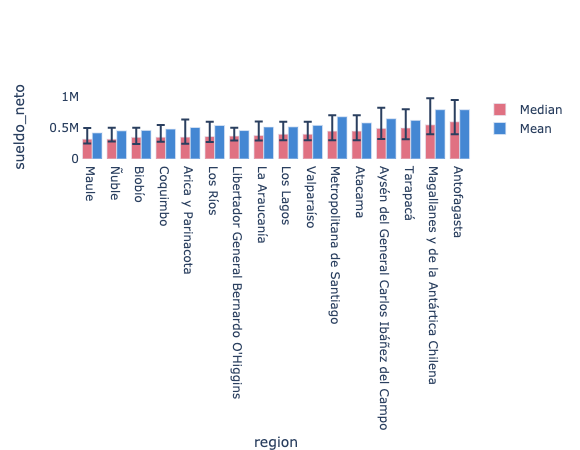

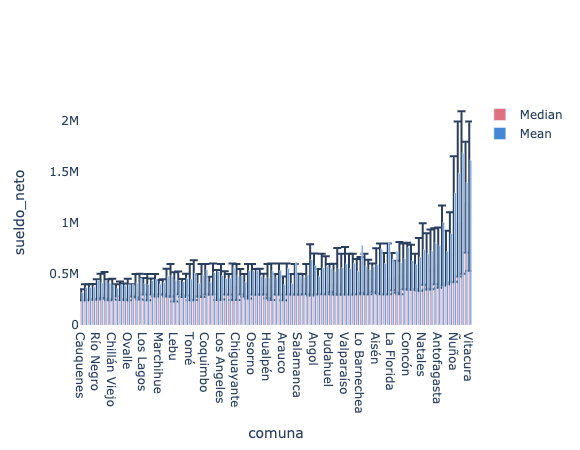

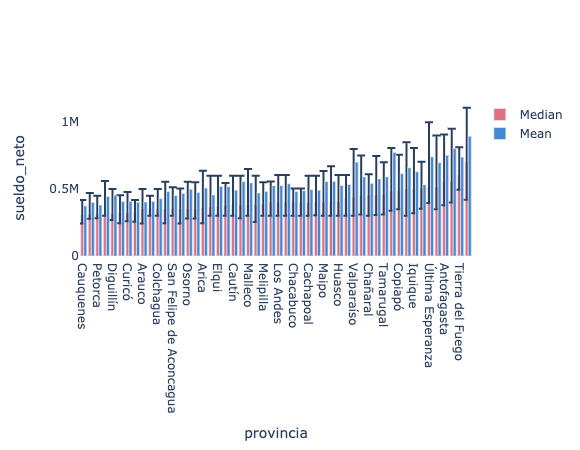

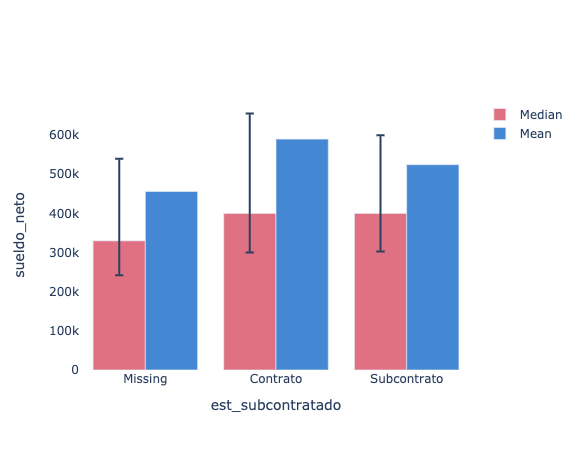

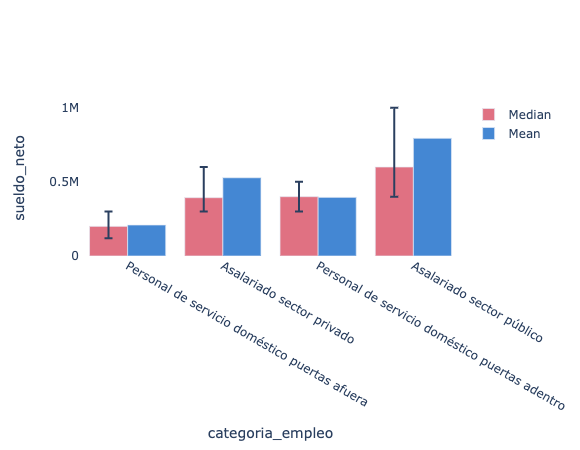

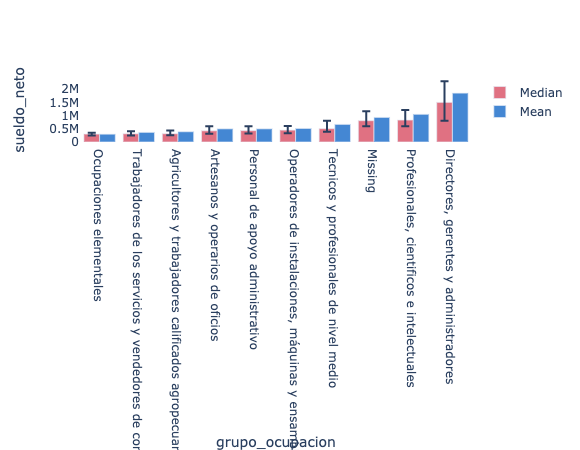

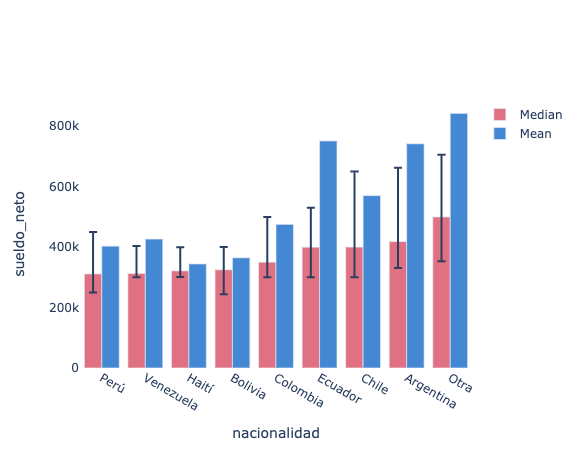

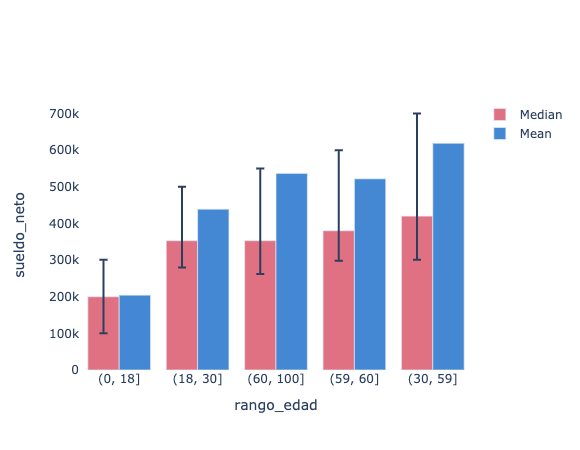

In [48]:
for f in categorical_features:
    fig = dplot.marginal_dependency_plot(datos, target, f, categorical_feature=True, lower_q=0.25, upper_q=0.75)
    fig.show()

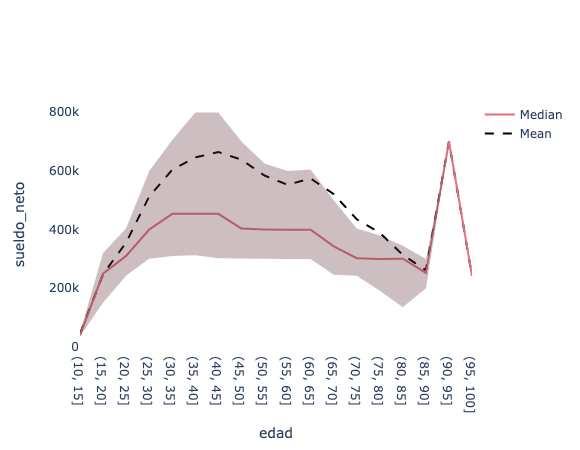

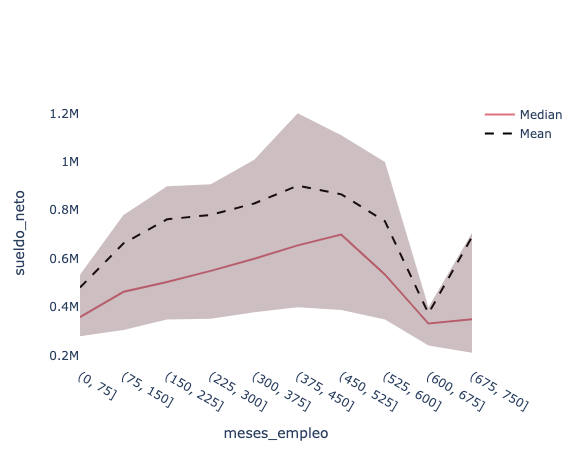

In [42]:
bins_dict = {
    'edad': np.linspace(10, 100, 19).astype(int),
    'meses_empleo': np.linspace(0, 750, 11).astype(int)
}
for f in numerical_features:
    fig = dplot.marginal_dependency_plot(datos, target, f, bins=bins_dict[f], lower_q=0.25, upper_q=0.75)
    fig.show()